In [1]:
import joblib
model = joblib.load("../models/bioavailability.pkl")

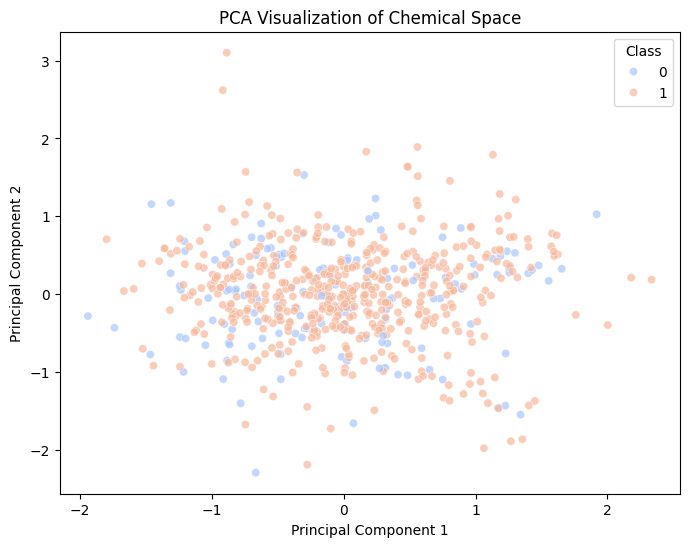

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


pca_vis = PCA(n_components=2)
x_pca_vis = pca_vis.fit_transform(x)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca_vis[:, 0], y=x_pca_vis[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Chemical Space")
plt.legend(title="Class")
plt.show()


In [3]:
import pandas as pd
merged_df = pd.read_csv("../data/merged_ft_bioavailability.csv")
print (merged_df.head())

   feature_0000  feature_0001  feature_0002  feature_0003  feature_0004  \
0     -0.078835     -0.011679      0.016453      0.116875      0.017020   
1     -0.005589      0.033513     -0.098280     -0.033604      0.064169   
2      0.142211      0.010828      0.038454     -0.039865      0.037069   
3      0.131876      0.028320      0.027727     -0.030910     -0.199551   
4      0.118314     -0.018779     -0.075858      0.093548      0.061447   

   feature_0005  feature_0006  feature_0007  feature_0008  feature_0009  ...  \
0     -0.005291      0.053792      0.056186     -0.107843      0.087488  ...   
1     -0.046036     -0.101748      0.046791     -0.006730     -0.008653  ...   
2      0.070435     -0.015946     -0.031854      0.025253      0.035572  ...   
3      0.088166     -0.053265      0.125531     -0.171739      0.035397  ...   
4      0.095041     -0.000166     -0.055122     -0.080563      0.063796  ...   

   feature_1015  feature_1016  feature_1017  feature_1018  feature_1

In [4]:
x = merged_df.drop(columns=["Y"])
y = merged_df["Y"]

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
pca = PCA(n_components=10) 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [9]:
import xgboost as xgb  
model = xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=6,
    random_state=42,
    n_estimators=100,
    scale_pos_weight=2
)  

model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [10]:
y_pred = model.predict(x_test_pca)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy:.4f}")

Accuracy after PCA: 0.7344


In [13]:
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(x_test_pca)[:, 1]  
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"XGBoost AUROC after PCA: {auc_score:.4f}")


XGBoost AUROC after PCA: 0.6418


In [14]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

ersilia_embeddings = pd.read_csv("../data/merged_ft_bioavailability.csv").values  

pca = PCA(n_components=4)
pca_embeddings = pca.fit_transform(ersilia_embeddings)

umap_model = umap.UMAP(n_components=2)
umap_embeddings = umap_model.fit_transform(ersilia_embeddings)

tsne_model = TSNE(n_components=2)
tsne_embeddings = tsne_model.fit_transform(ersilia_embeddings)


In [16]:
x_train = pca_embeddings
x = x_train
y = y

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


model = xgb.XGBClassifier(random_state=42)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


Accuracy: 0.7422
Precision: 0.8218
Recall: 0.8469
F1 Score: 0.8342
AUC Score: 0.7544


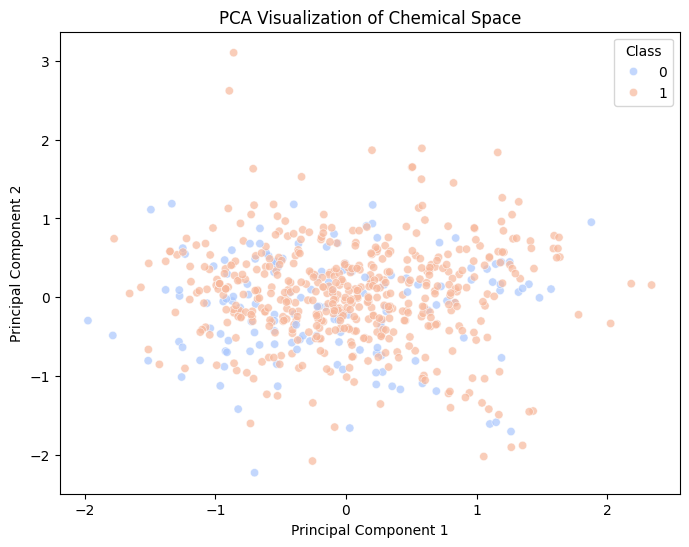

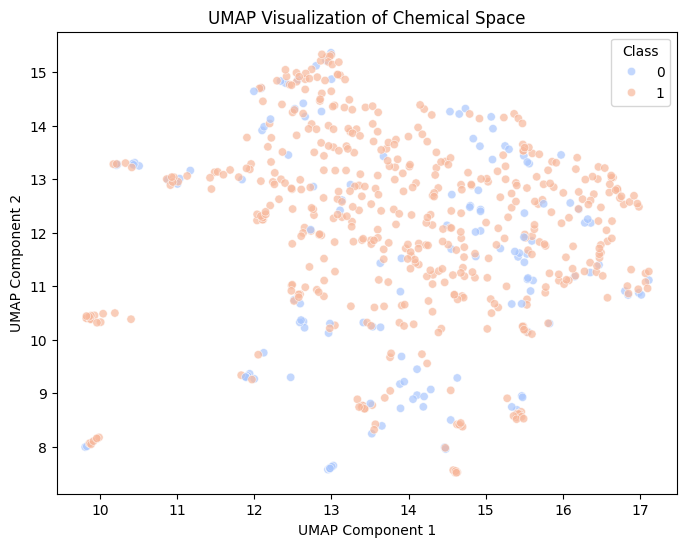

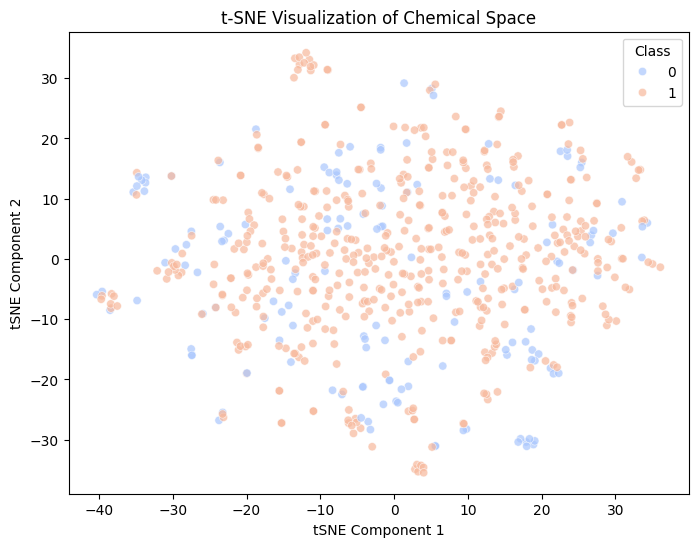

In [19]:


# Apply PCA (for visualization purposes, you reduce the data to 2D)
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(ersilia_embeddings)

# Apply UMAP (another dimensionality reduction technique)
umap_model = umap.UMAP(n_components=2)
umap_embeddings = umap_model.fit_transform(ersilia_embeddings)

# Apply t-SNE (another technique for dimensionality reduction)
tsne_model = TSNE(n_components=2)
tsne_embeddings = tsne_model.fit_transform(ersilia_embeddings)

# Create DataFrame to make plotting easier
df_pca = pd.DataFrame(pca_embeddings, columns=['PCA1', 'PCA2'])
df_pca['Class'] = y  # Add the target labels

df_umap = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
df_umap['Class'] = y  # Add the target labels

df_tsne = pd.DataFrame(tsne_embeddings, columns=['tSNE1', 'tSNE2'])
df_tsne['Class'] = y  # Add the target labels

# Visualizing PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Class', palette='coolwarm', alpha=0.7)
plt.title('PCA Visualization of Chemical Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()

# Visualizing UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Class', palette='coolwarm', alpha=0.7)
plt.title('UMAP Visualization of Chemical Space')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Class')
plt.show()

# Visualizing t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='Class', palette='coolwarm', alpha=0.7)
plt.title('t-SNE Visualization of Chemical Space')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(title='Class')
plt.show()


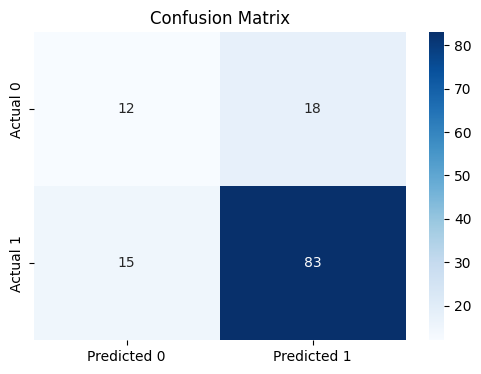

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.show()